# Credit Risk Modeling Project

### (Consumer Loans - Lending Club Loan Data retrieved from Kaggle) 

author      : Eray Ferah \
dates       : 12.11.2020 ~ \
data source : https://www.kaggle.com/wordsforthewise/lending-club \
course source : https://www.udemy.com/course/credit-risk-modeling-in-python

##### Importing necessary libraries for data preprocessing.

In [2]:
import numpy as np
import pandas as pd

##### Importing the data (which is in csv format).

Importing the data and creating a copy for back up reason.

In [3]:
loan_data_bkp = pd.read_csv("C:\\Users\\ASUS\\eray123\\Credit Risk Modeling\\loan_data_2007_2014.csv")
loan_data = loan_data_bkp.copy() # or loan_data_bkp[:]

C:\Users\ASUS\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Exploring data

Enabling all columns to be observable in pandas data frame. Checking the data.

In [4]:
pd.options.display.max_columns = None
loan_data.head()
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


Checking column names and data types that they have.

In [5]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

We have to preprocess some data types since they are not in the format as we would like to have. 

#### Initial data preprocessing to shape the data

In [7]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We manipulate (deleting specific parts of strings) strings and cast them as numbers. Creating new column named 'emp_length_int'.

In [8]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','').str.replace('< 1 year',str(0)).str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','').str.replace(' year','')
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

Checking the type of data.

In [9]:
type(loan_data['emp_length_int'][0])

str

Since it is still string (or object), casting entire column as numeric.

In [10]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

Checking the type of data again.

In [11]:
type(loan_data['emp_length_int'][0])

numpy.float64

Term variable also needs preprocessing. 

In [12]:
type(loan_data['term'][0])

str

In [13]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months',''))

In [15]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

In [16]:
type(loan_data['term_int'][0])

numpy.int64

We also cast date variables as dates (currently, they are strings.)

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [18]:
loan_data['todays_date'] = pd.to_datetime('2017-12-01')

In [19]:
loan_data['Days_since_earliest_cr_line'] = loan_data['todays_date']-loan_data['earliest_cr_line_date']

Using timedelta function in denominator to get the data in months format. source: https://numpy.org/doc/stable/reference/arrays.datetime.html

In [20]:
loan_data['mths_since_earliest_cr_line'] = round(loan_data['Days_since_earliest_cr_line']/ np.timedelta64(1,'M'))

In [21]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Minimum -612 months looks fishy and we have to check this one. We will filter each entry lower than 0. 

In [22]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


The issue is date stamp starts from 1970 and anything below from this date, automatically understood somewhere beyond 1970s. We could assume these entries are equal to maximum mths_since_earliest_cr_line. 

In [23]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-23-60169add49d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


Checking the new minimum.

In [24]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

We will be doing the simillar preprocessing for issue_date.

In [26]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [28]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [29]:
loan_data['Days_since_issue_d'] = loan_data['todays_date']-loan_data['issue_d_date']
loan_data['mths_since_issue_d'] = round(loan_data['Days_since_issue_d']/np.timedelta64(1,'M'))
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

#### Preprocessing discreate variables(features)

Creating dummy variables for; Grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status

In [30]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [31]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [40]:
loan_data_dummies = pd.concat([pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')],
                              axis = 1)

In [89]:
loan_data['loan_status'].columns.values

AttributeError: 'Series' object has no attribute 'columns'

In [41]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [42]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [43]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

#### Checking missing values and cleaing

In [44]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,todays_date,Days_since_earliest_cr_line,mths_since_earliest_cr_line,issue_d_date,Days_since_issue_d,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [45]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

Variables that we will need for the analysis: annual_inc, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq, total_rev_hi_lim, emp_length_int, mths_since_earliest_cr_line

In [46]:
pd.options.display.max_rows = 100

In [47]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [49]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace = True)
loan_data['annual_inc'].isnull().sum()

0

In [52]:
loan_data['mths_since_earliest_cr_line'].fillna(int(0), inplace = True)
loan_data['acc_now_delinq'].fillna(int(0), inplace = True)
loan_data['total_acc'].fillna(int(0), inplace = True)
loan_data['pub_rec'].fillna(int(0), inplace = True)
loan_data['open_acc'].fillna(int(0), inplace = True)
loan_data['inq_last_6mths'].fillna(int(0), inplace = True)
loan_data['delinq_2yrs'].fillna(int(0), inplace = True)
loan_data['emp_length_int'].fillna(int(0), inplace = True)

## PD Model - Data Preparation
#### Dependent Variable, Good/Bad Definition 

In [53]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [54]:
loan_data['loan_status'].value_counts() 

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [55]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Defaults as 0, Non Defaults as 1.

In [56]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Late (31-120 days)','Default', 'Charged Off', 
                                                                'Does not meet the credit policy. Status:Charged Off']),0,1)

#### Independent Variables

Fine Classing : bundling continous variables.\
Weight of evidence : to what extent an independent variable would predict a dependent variable. \
Coarse Classing : The process of constructing new categories based on the initial ones.(combining fine classing groups based on weight of evidence.)\
Information value : How much information the original independent variable brings with respect to explaining the dependent variable.

#### Splitting Data (Training - Test)

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), 
                                                                                                                  loan_data['good_bad'], 
                                                                                                                  test_size = 0.2,
                                                                                                                  random_state = 42)

#### Data Preparation

In [143]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

We will calculate Weight of Evidence with 'grade' variable.

In [144]:
df_inputs_prepr['grade'].unique() 

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

Creating a new data frame for 'grade' versus 'good_bad'.

In [145]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis = 1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


Weight of Evidence formula = Ln(%Good/%Bad) \
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

Explanation of the formula: ln of a number which is bigger than 1 (meaning that % of good is more than % of bad) is positive, otherwise negative.

In [146]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


Since previous step counts all values per Grades, we could make the ratio of goods (1's) by having the mean method.

In [147]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.962338
1,B,0.923085
2,C,0.882905
3,D,0.844314
4,E,0.805178
5,F,0.775472
6,G,0.697605


Merging these 2 dfs and changing column names to have them more intuitive.

In [148]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis =1)
df1 = df1.iloc[:,[0,1,3]]

In [149]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop of good']

In [150]:
df1.iloc[:,[1]].sum()

n_obs    93257
dtype: int64

In [151]:
df1['n_good'] = df1['prop of good'] * df1['n_obs']
df1['n_bad'] = (1-df1['prop of good']) * df1['n_obs']
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

Checking and sorting per WoE. 

In [152]:
df1 = df1.sort_values(['WoE']); df1 = df1.reset_index(drop = True)

In [153]:
df1

,grade,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.697605,466.0,202.0,0.005610,0.019823,-1.262323
1,F,2699,0.775472,2093.0,606.0,0.025197,0.059470,-0.858767
2,E,7145,0.805178,5753.0,1392.0,0.069257,0.136605,-0.679261
3,D,15390,0.844314,12994.0,2396.0,0.156428,0.235132,-0.407554
4,C,25048,0.882905,22115.0,2933.0,0.266231,0.287831,-0.078010
5,B,27199,0.923085,25107.0,2092.0,0.302250,0.205299,0.386785
6,A,15108,0.962338,14539.0,569.0,0.175027,0.055839,1.142469


To see absolute change (difference) from one row above;

In [154]:
df1['diff_prop_good'] = df1['prop of good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [155]:
df1['Info Val'] = (df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1['Info Val'] = df1['Info Val'].sum()

#### Creating a function which automates actions being done in previous step, for other variables.

In [156]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis =1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop of good']
    df['n_good'] = df['prop of good'] * df['n_obs']
    df['n_bad'] = (1-df['prop of good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE']); df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop of good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['Info Val'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['Info Val'] = df['Info Val'].sum()
    return df

#### Visualizing Results

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Creating a function that plots WoE in Y axis and variables in X axis. 

In [158]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str)); y = df_WoE['WoE']
    plt.figure(figsize = (18,6)) # Figsize(width, heigth)
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k') # marker 'o' means dot. 
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.show()
    
    

Trying 2 functions created in previous steps.

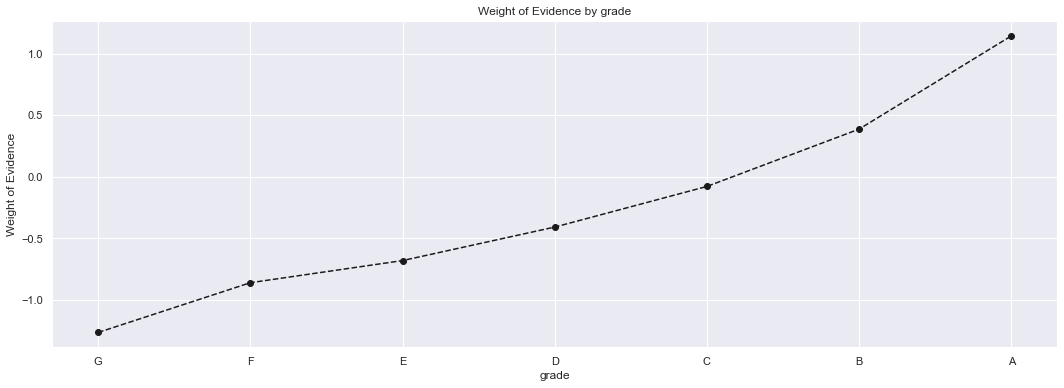

In [159]:
plot_by_woe(woe_discrete(df_inputs_prepr,'grade',df_targets_prepr))

#### Preprocessing discrete variables: creating dummy variables (I)

We choose the variable with lowest weight of evidence as reference variable.

In [160]:
temp_df = woe_discrete(df_inputs_prepr,'home_ownership', df_targets_prepr)
temp_df

,home_ownership,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,OTHER,45,0.777778,35.0,10.0,0.000421,0.000981,-0.845478,NaN,NaN,0.022938
1,NONE,10,0.800000,8.0,2.0,0.000096,0.000196,-0.711946,0.022222,0.133531,0.022938
2,RENT,37874,0.874003,33102.0,4772.0,0.398498,0.468302,-0.161412,0.074003,0.550534,0.022938
3,OWN,8409,0.888572,7472.0,937.0,0.089951,0.091953,-0.022006,0.014568,0.139406,0.022938
4,MORTGAGE,46919,0.904751,42450.0,4469.0,0.511033,0.438567,0.152922,0.016179,0.174928,0.022938


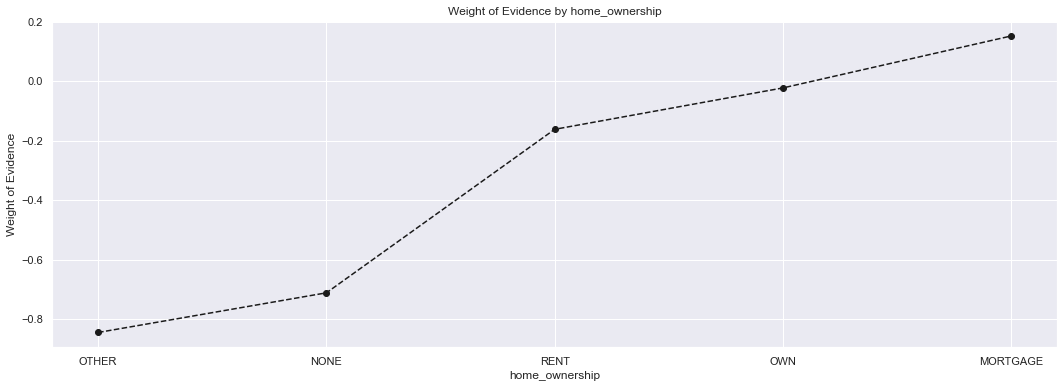

In [161]:
plot_by_woe(temp_df)

We will combine some variables into one variable since they are not represented as much as other ones.

In [162]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

#### Preprocessing discrete variables: creating dummy variables (II)

In [163]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [164]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,NE,1,0.000000,0.0,1.0,0.000000,0.000098,-inf,NaN,NaN,inf
1,ID,2,0.500000,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
2,NV,1298,0.855932,1111.0,187.0,0.013375,0.018351,-0.316333,0.355932,1.781907,inf
3,HI,486,0.860082,418.0,68.0,0.005032,0.006673,-0.282267,0.004150,0.034067,inf
4,FL,6426,0.870059,5591.0,835.0,0.067307,0.081943,-0.196759,0.009977,0.085508,inf
5,AL,1182,0.873096,1032.0,150.0,0.012424,0.014720,-0.169622,0.003037,0.027137,inf
6,NJ,3676,0.875408,3218.0,458.0,0.038740,0.044946,-0.148595,0.002312,0.021027,inf
7,LA,1130,0.876106,990.0,140.0,0.011918,0.013739,-0.142178,0.000698,0.006416,inf
8,NY,8031,0.879965,7067.0,964.0,0.085076,0.094603,-0.106141,0.003859,0.036038,inf
9,RI,403,0.880893,355.0,48.0,0.004274,0.004711,-0.097324,0.000928,0.008817,inf


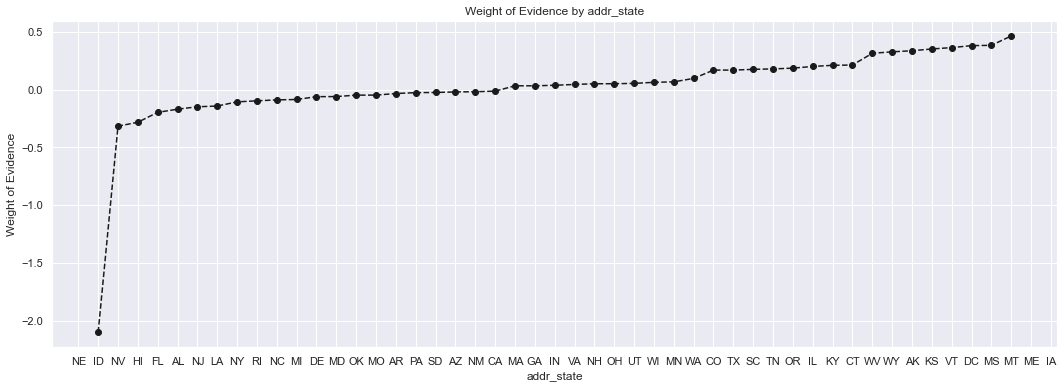

In [165]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [166]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

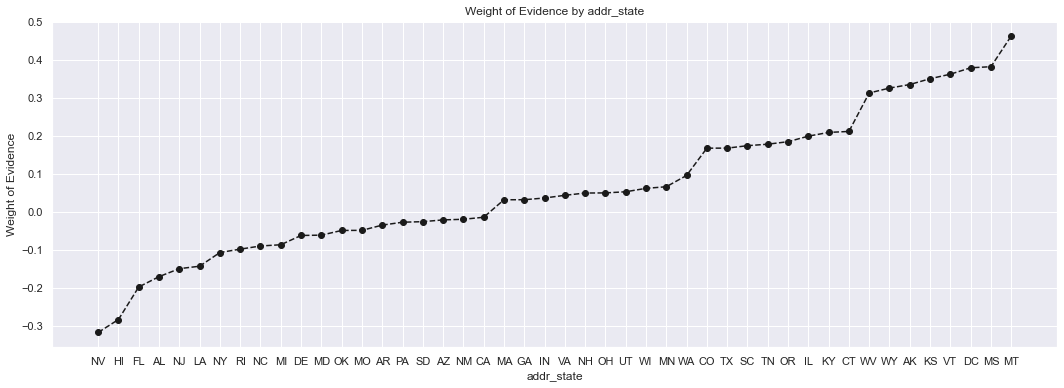

In [167]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

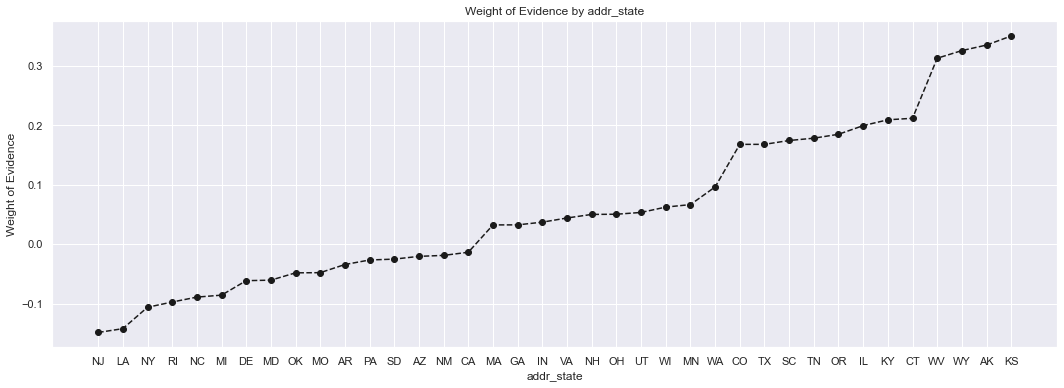

In [168]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [169]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [170]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,Verified,33641,0.872031,29336.0,4305.0,0.353161,0.422473,-0.179202,NaN,NaN,0.022684
1,Source Verified,29963,0.895738,26839.0,3124.0,0.323101,0.306575,0.052501,0.023707,0.231704,0.022684
2,Not Verified,29653,0.906890,26892.0,2761.0,0.323739,0.270952,0.177995,0.011152,0.125494,0.022684


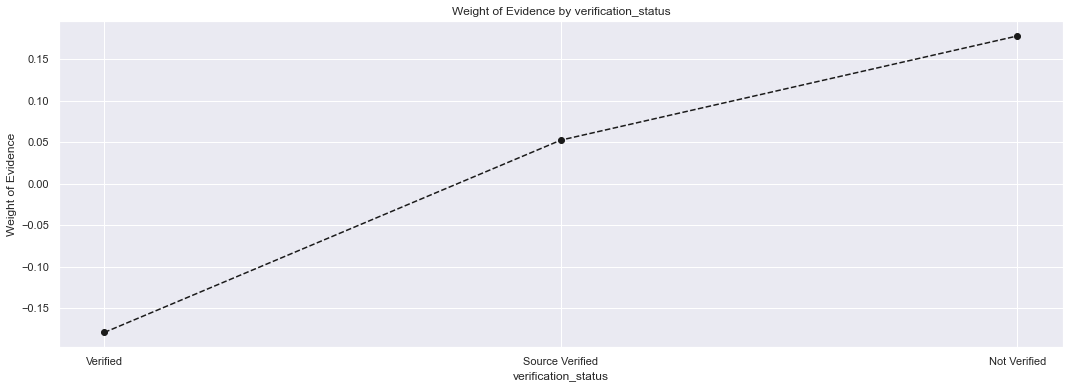

In [171]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [172]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,educational,89,0.752809,67.0,22.0,0.000807,0.002159,-0.984590,NaN,NaN,0.045124
1,renewable_energy,70,0.771429,54.0,16.0,0.000650,0.001570,-0.881845,0.018620,0.102745,0.045124
2,small_business,1431,0.777079,1112.0,319.0,0.013387,0.031305,-0.849516,0.005650,0.032329,0.045124
3,medical,918,0.857298,787.0,131.0,0.009474,0.012856,-0.305210,0.080220,0.544307,0.045124
4,house,439,0.858770,377.0,62.0,0.004539,0.006084,-0.293130,0.001471,0.012080,0.045124
5,other,4806,0.861007,4138.0,668.0,0.049815,0.065554,-0.274561,0.002237,0.018569,0.045124
6,wedding,456,0.864035,394.0,62.0,0.004743,0.006084,-0.249024,0.003028,0.025537,0.045124
7,moving,602,0.878738,529.0,73.0,0.006368,0.007164,-0.117712,0.014702,0.131312,0.045124
8,vacation,496,0.881048,437.0,59.0,0.005261,0.005790,-0.095845,0.002311,0.021867,0.045124
9,debt_consolidation,55012,0.885916,48736.0,6276.0,0.586707,0.615898,-0.048556,0.004867,0.047289,0.045124


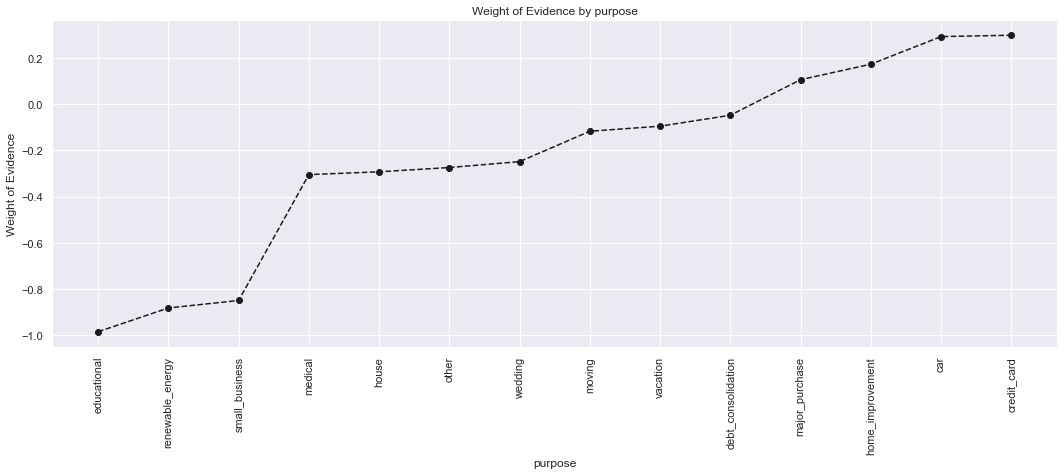

In [173]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [174]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [175]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,f,60491,0.879685,53213.0,7278.0,0.640603,0.71423,-0.108794,NaN,NaN,0.024888
1,w,32766,0.911127,29854.0,2912.0,0.359397,0.28577,0.229238,0.031443,0.338032,0.024888


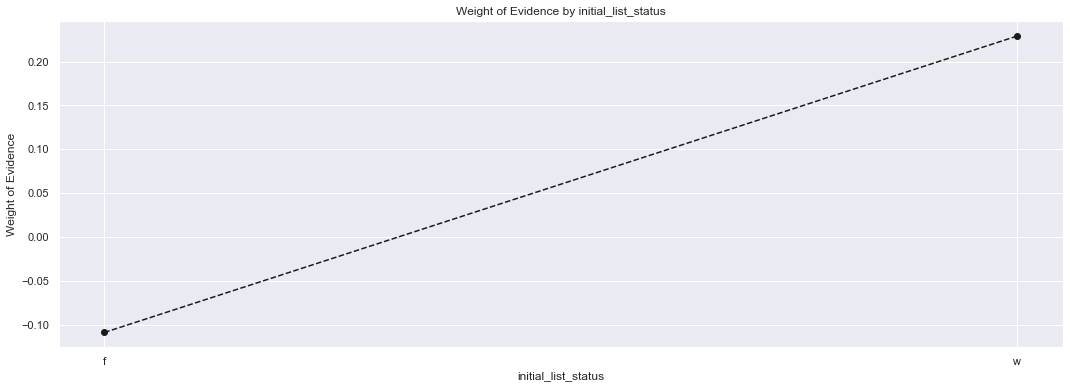

In [176]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

#### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [177]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [178]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([60, 36], dtype=int64)

In [179]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,NaN,NaN,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.043016,0.414608,0.036603


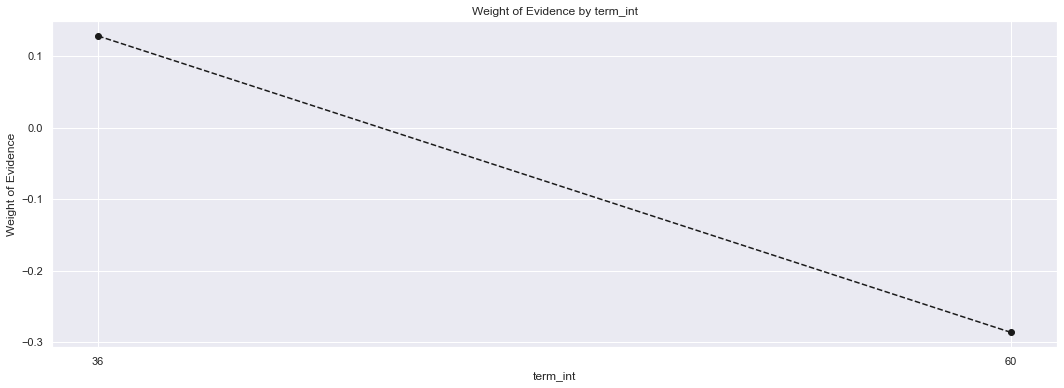

In [180]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [181]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [182]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [183]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11553,0.874491,0.123883,10103.0,1450.0,0.121625,0.142296,-0.156972,NaN,NaN,0.007766
1,1.0,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.062905,0.019273,0.018102,0.176245,0.007766
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.005192,0.053039,0.007766
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.001923,0.019389,0.007766
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.000144,0.001465,0.007766
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.003208,0.032228,0.007766
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007409,0.071500,0.007766
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.014736,0.146326,0.007766
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.003451,0.035790,0.007766
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.002711,0.028024,0.007766


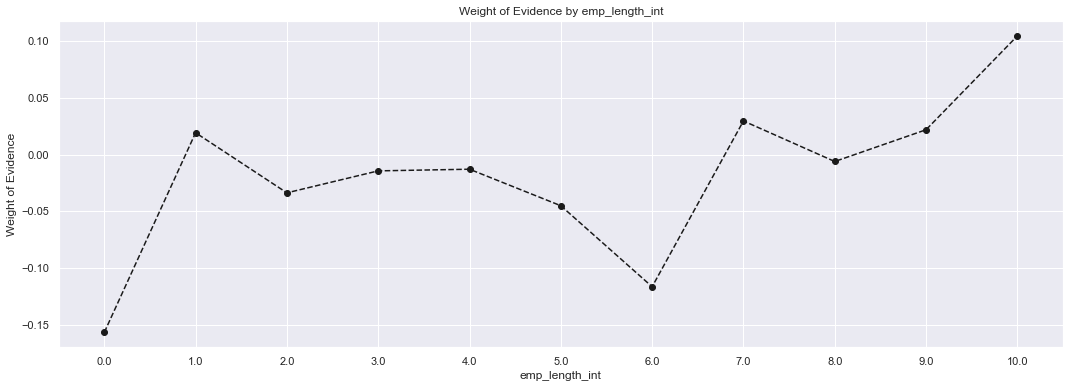

In [184]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [185]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [186]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [187]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [188]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [189]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,NaN,NaN,0.126297
1,"(37.8, 39.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.015392,0.266241,0.126297
2,"(39.6, 41.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.010428,0.150833,0.126297
3,"(41.4, 43.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.010829,0.138715,0.126297
4,"(43.2, 45.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.068793,0.131267,0.006248,0.073381,0.126297
5,"(45.0, 46.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.031894,0.047781,0.007572,0.083487,0.126297
6,"(46.8, 48.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.005027,0.052525,0.126297
7,"(48.6, 50.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.004339,0.043669,0.126297
8,"(50.4, 52.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.007022,0.067693,0.126297
9,"(52.2, 54.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.004770,0.044080,0.126297


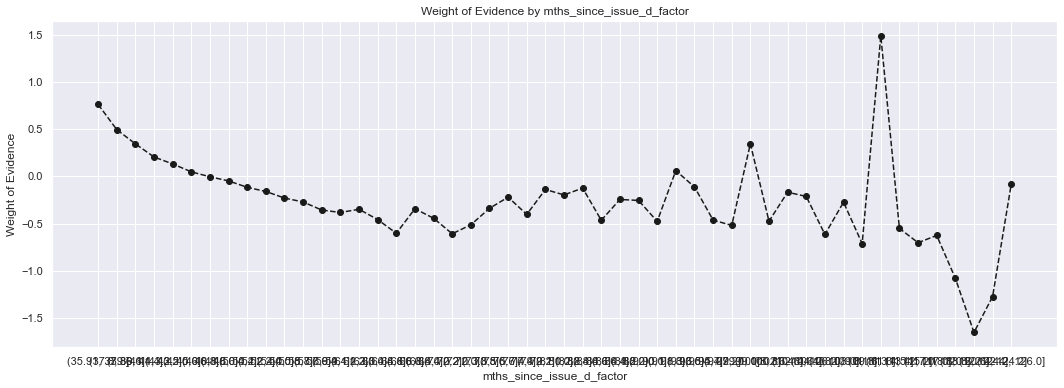

In [190]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

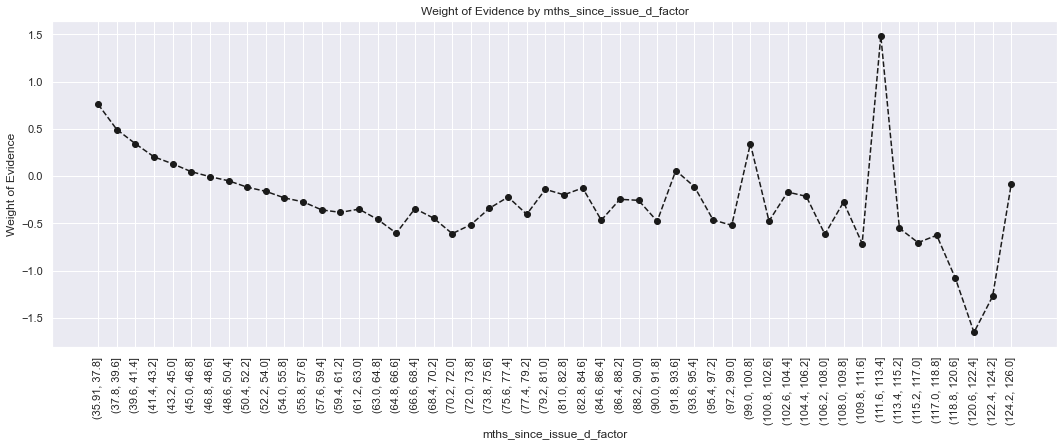

In [191]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

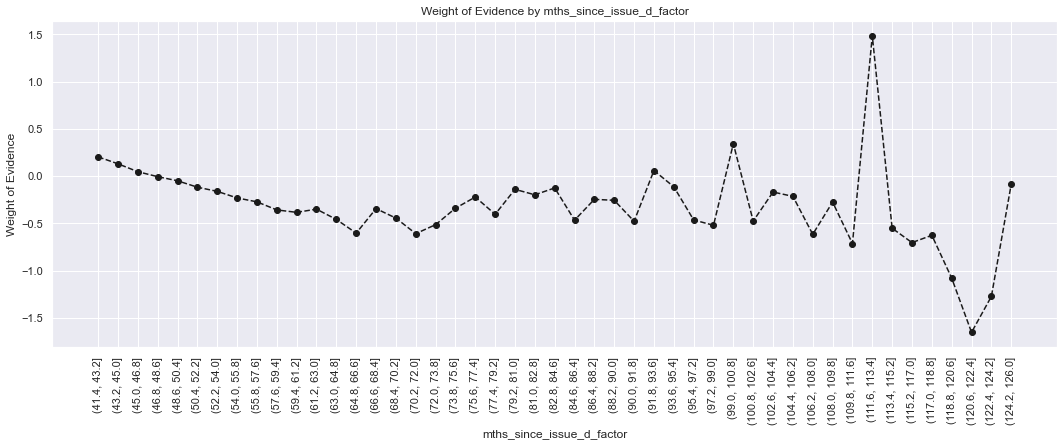

In [192]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [193]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [194]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [195]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


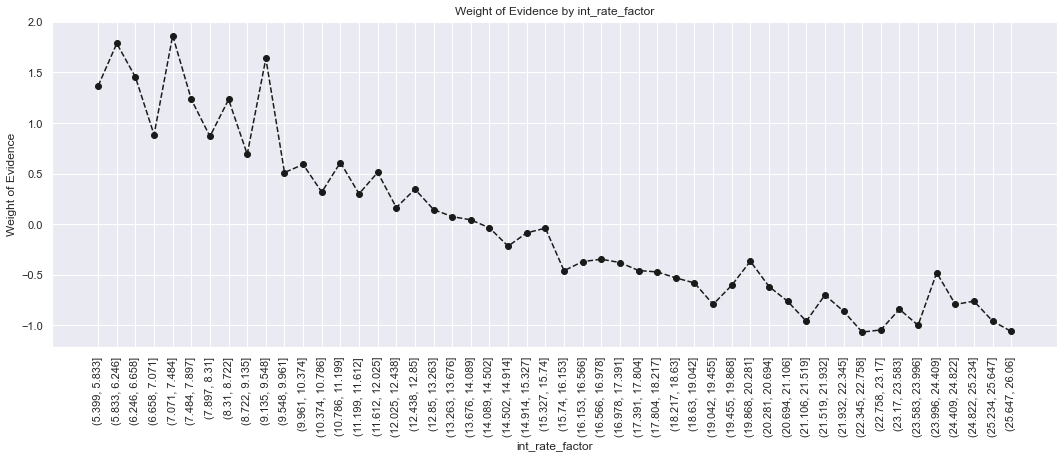

In [196]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [197]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [198]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [199]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,NaN,NaN,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.015372,0.155467,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.003948,0.043194,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.006417,0.069472,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.002215,0.023117,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.008625,0.086254,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.015213,0.156305,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.008438,0.095840,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.024754,0.262767,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.011563,0.116015,0.018663


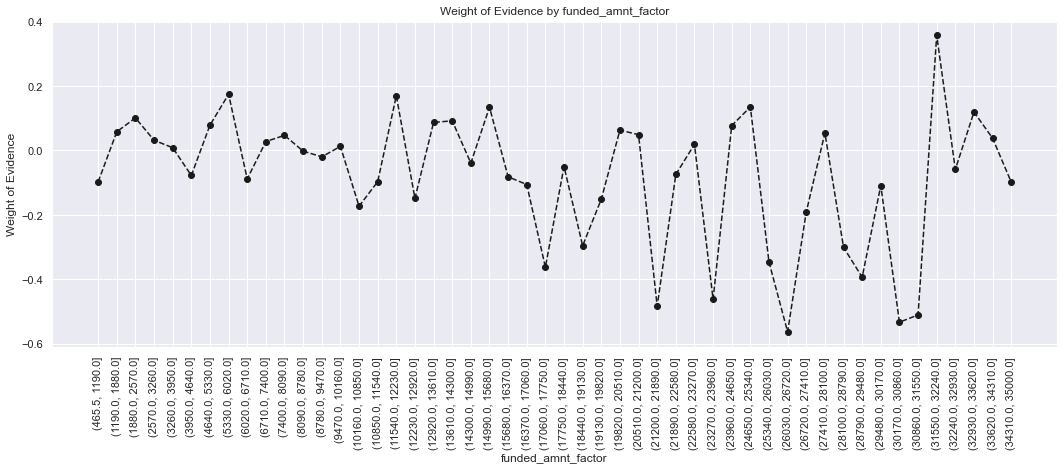

In [200]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

#### Data Preparation: Continuous Variables, Part 1 and 2: Homework

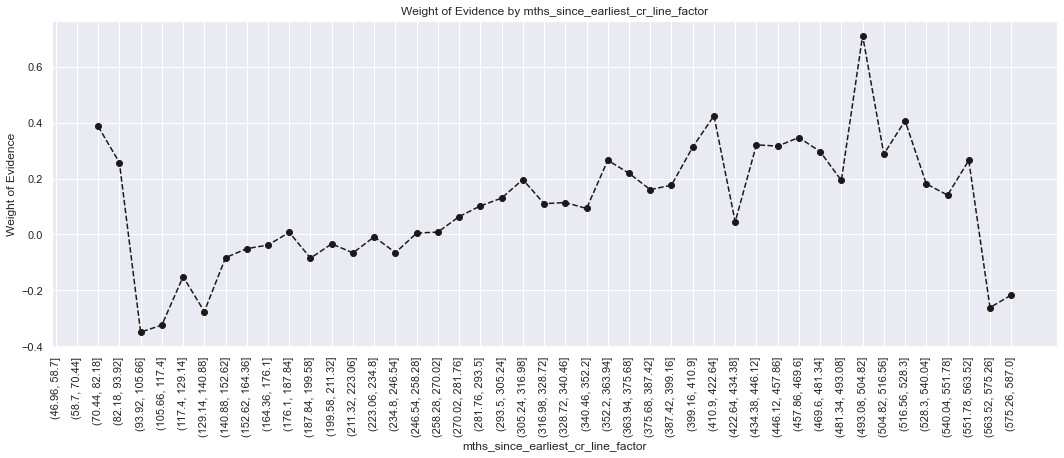

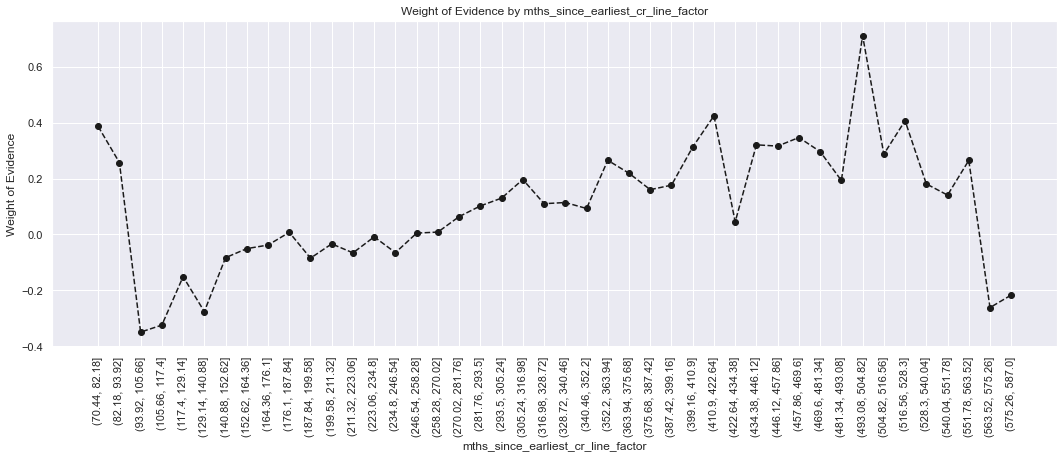

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


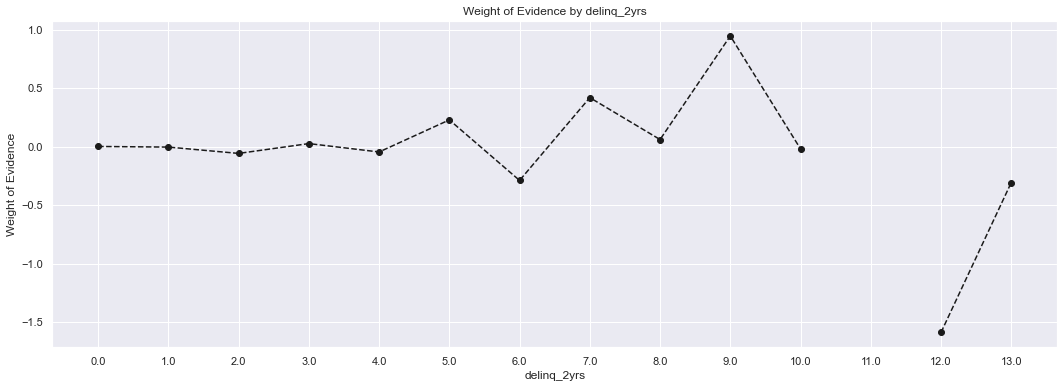

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


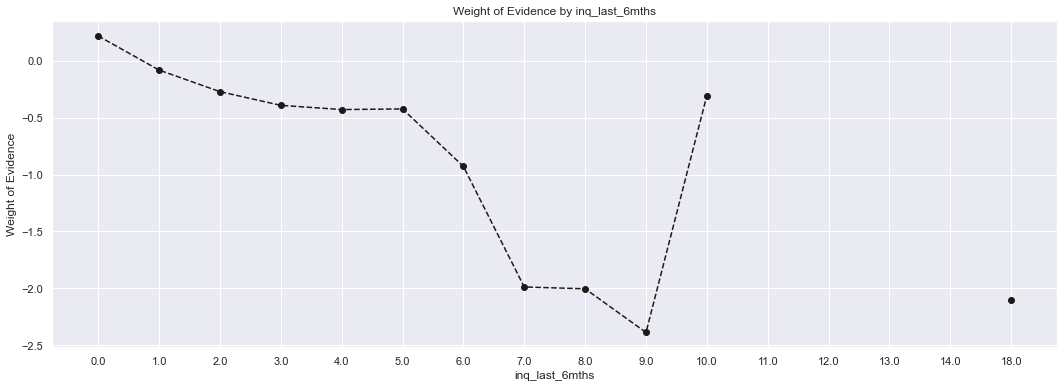

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


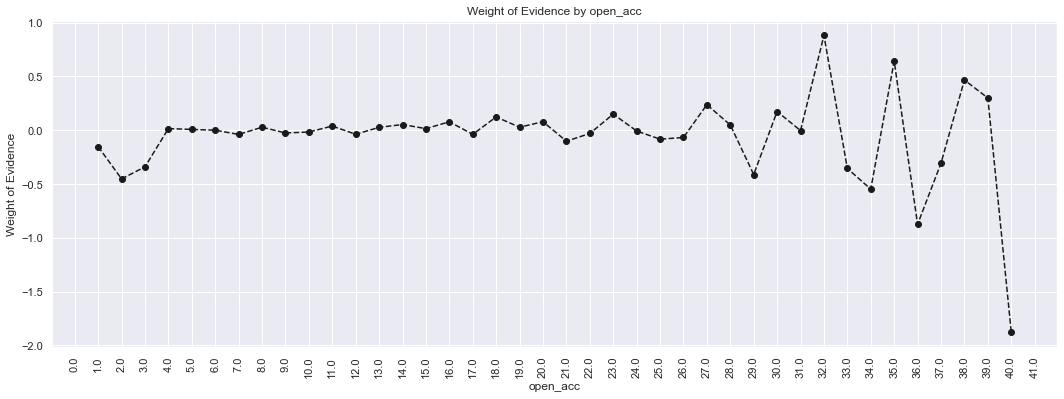

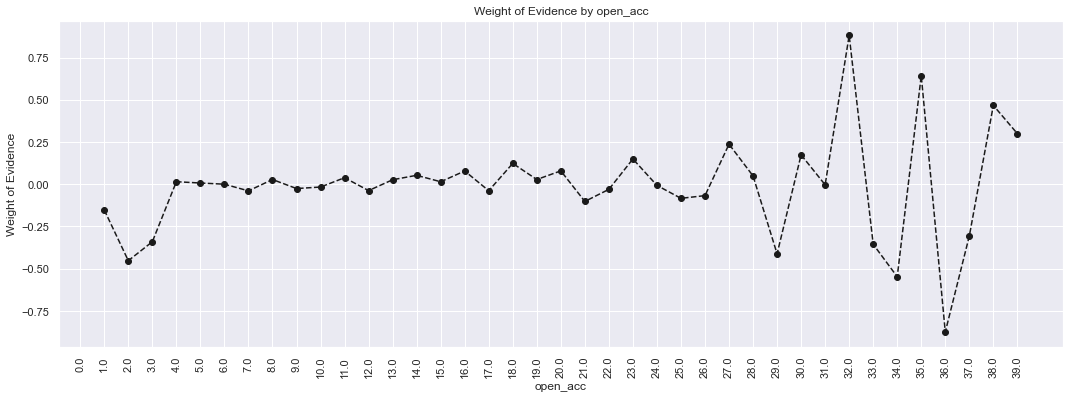

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


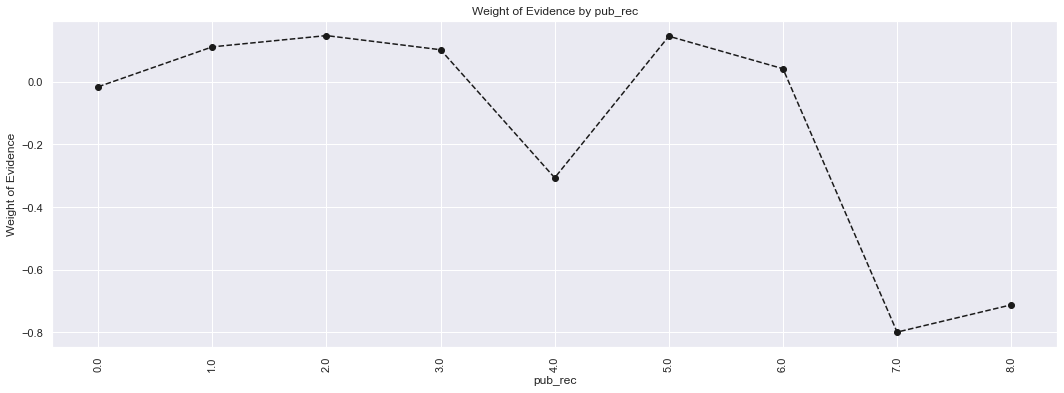

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


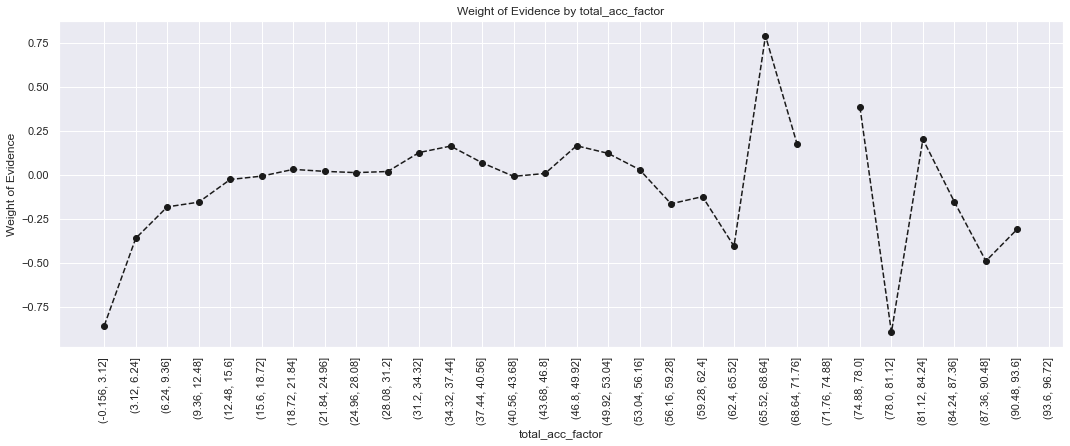

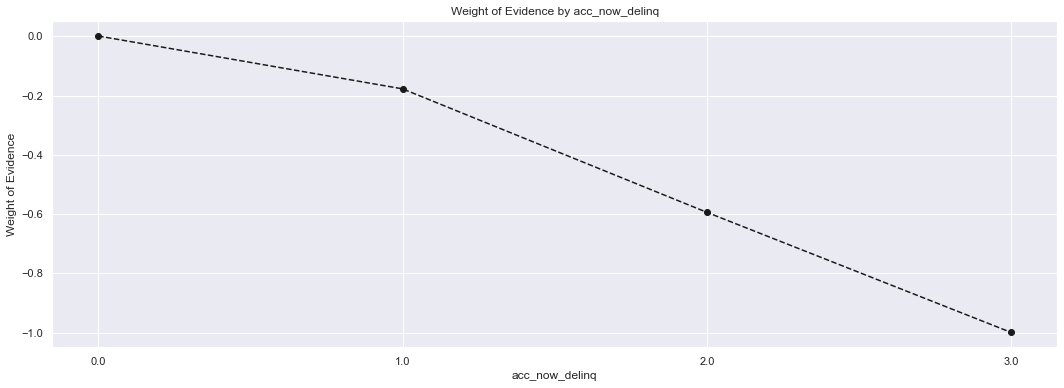

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


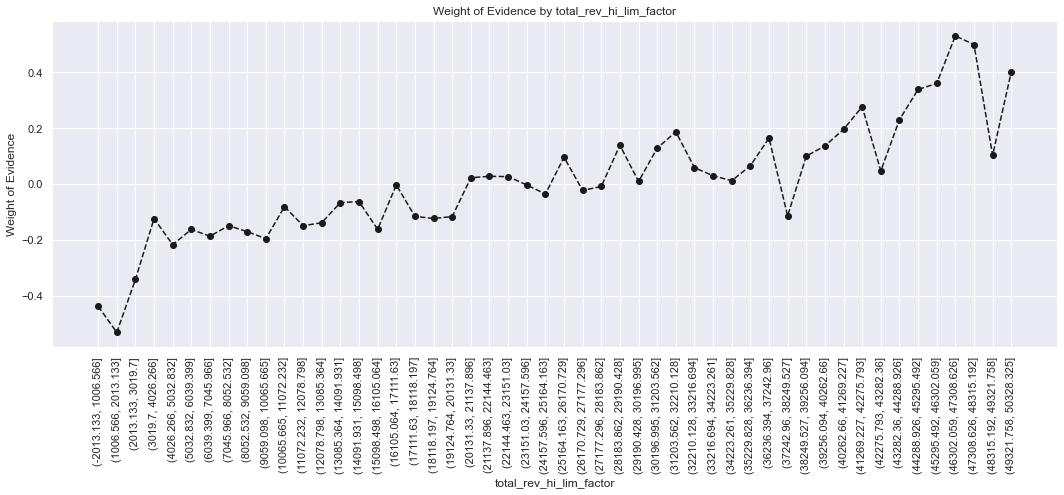

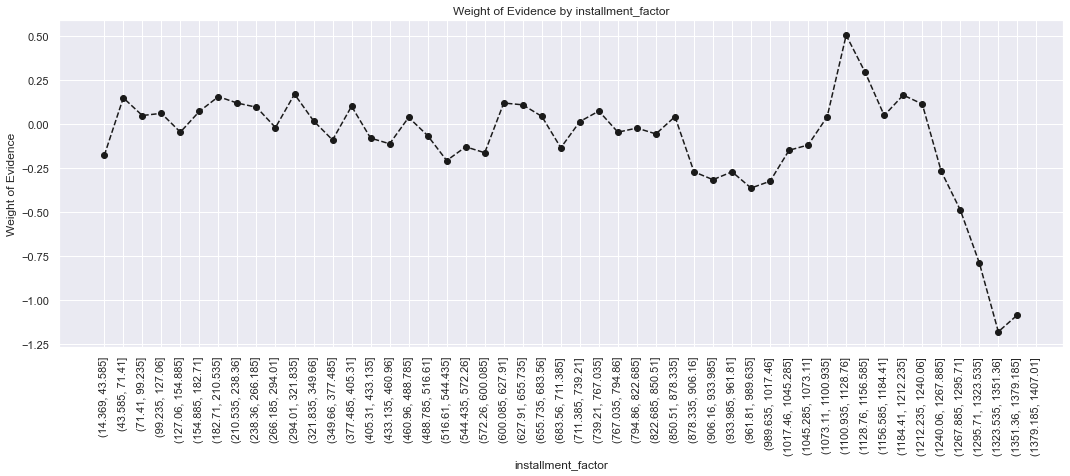

In [201]:
# mths_since_earliest_cr_line

df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

plot_by_woe(df_temp.iloc[6: , : ], 90)

# We plot the weight of evidence values.

# We create the following categories:

# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352

df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

# delinq_2yrs

df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp)

# We plot the weight of evidence values.

# Categories: 0, 1-3, >=4

df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)

df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)

df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

# inq_last_6mths

df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp)

# We plot the weight of evidence values.

# Categories: 0, 1 - 2, 3 - 6, > 6

df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)

df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)

df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)

df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

# open_acc

df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

plot_by_woe(df_temp.iloc[ : 40, :], 90)

# We plot the weight of evidence values.

# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'

df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)

df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)

df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)

df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)

df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)

df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)

df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)

df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

# pub_rec

df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories '0-2', '3-4', '>=5'

df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)

df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)

df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

# total_acc

df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories: '<=27', '28-51', '>51'

df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)

df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)

df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

# acc_now_delinq

df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp)

# We plot the weight of evidence values.

# Categories: '0', '>=1'

df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)

df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

# total_rev_hi_lim

df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp.iloc[: 50, : ], 90)

# We plot the weight of evidence values.

# Categories

# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'

df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

# installment

df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
<ipython-input-202-14b4c1afe8fc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


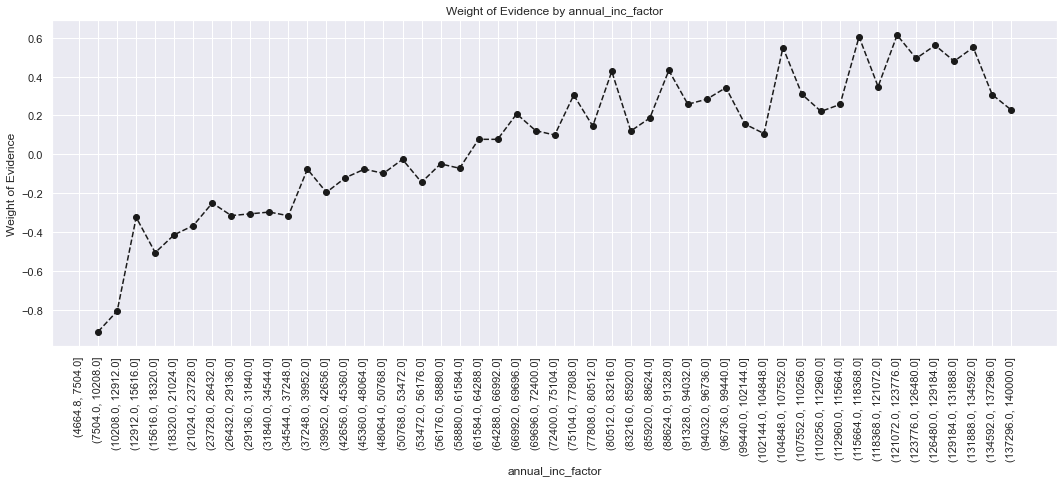

<ipython-input-202-14b4c1afe8fc>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


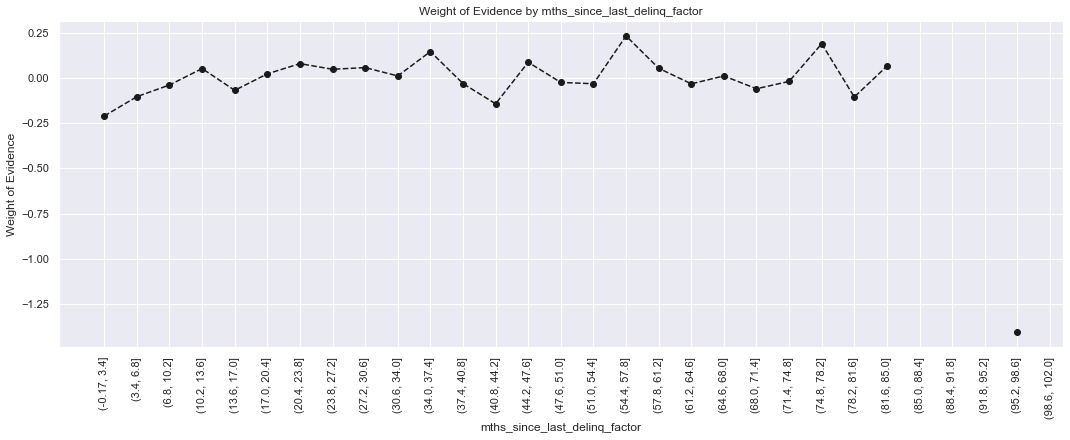

In [202]:
# annual_inc

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

# Initial examination shows that there are too few individuals with large income and too many with small income.

# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine

# the categories of everyone with 140k or less.

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

#loan_data_temp = loan_data_temp.reset_index(drop = True)

#df_inputs_prepr_temp

df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.

df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)

df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)

df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)

df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)

df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)

df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)

df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)

df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)

df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)

df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)

df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)

df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

# mths_since_last_delinq

# We have to create one category for missing values and do fine and coarse classing for the rest.

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories: Missing, 0-3, 4-30, 31-56, >=57

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)

df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)

df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)

df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)

df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

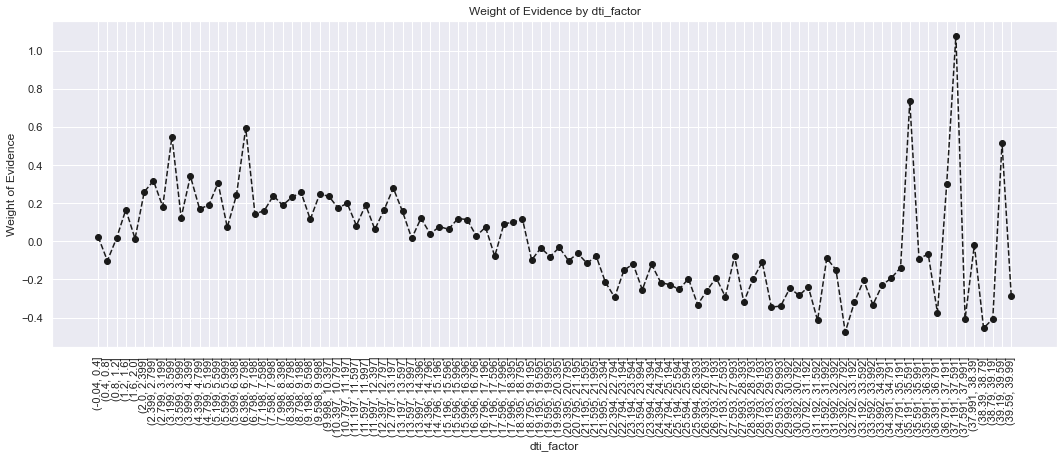

<ipython-input-203-88e685254471>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


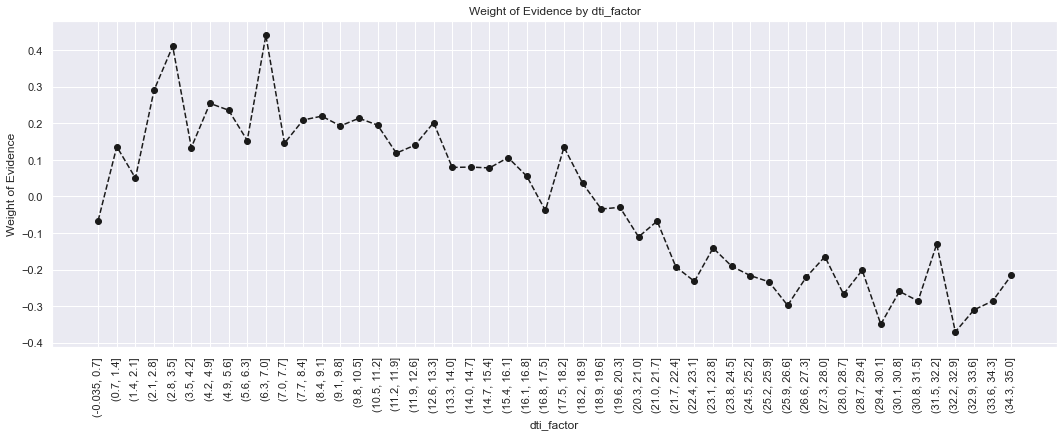

<ipython-input-203-88e685254471>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\ASUS\Anaconda3\Lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


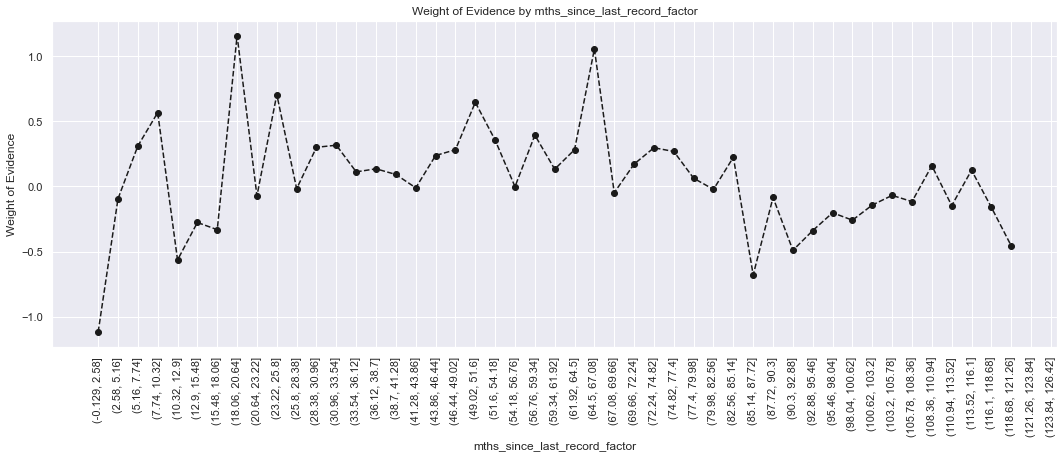

In [203]:
# dti

df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Similarly to income, initial examination shows that most values are lower than 200.

# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine

# the categories of everyone with 150k or less.

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories:

df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)

df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)

df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)

df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)

df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)

df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)

df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)

df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)

df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)

df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

# mths_since_last_record

# We have to create one category for missing values and do fine and coarse classing for the rest.

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

#sum(loan_data_temp['mths_since_last_record'].isnull())

df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'

df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)

df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)

df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)

df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)

df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)

df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)

df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

#### Preprocessing the Test Dataset

In [204]:
#####

#loan_data_inputs_train = df_inputs_prepr

#####

loan_data_inputs_test = df_inputs_prepr



In [205]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')

loan_data_targets_train.to_csv('loan_data_targets_train.csv')

loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')

loan_data_targets_test.to_csv('loan_data_targets_test.csv')